In [1]:
import os
import sys

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
import seaborn

WORKING_DIR_PATH = globals()['_dh'][0]
WORKING_DIR_PARENT_PATH = os.path.dirname(WORKING_DIR_PATH)
sys.path.insert(1, WORKING_DIR_PARENT_PATH)
from custom_module.utilities import *

## Data Exploration & Cleaning

In [2]:
# load csv file & make a copy
features_gtzan = pd.read_csv(MOUNTED_DATASET_PATH + '/data/features_gtzan_1.csv', index_col=0)
features_fma = pd.read_csv(MOUNTED_DATASET_PATH + '/data/features_fma_1.csv', index_col=0)
features_combined = features_gtzan.append(features_fma, ignore_index=True)
features_combined_original = features_combined.copy()

In [3]:
features_combined

,25th_percentile_db4_cA4,25th_percentile_db4_cD1,25th_percentile_db4_cD2,25th_percentile_db4_cD3,25th_percentile_db4_cD4,25th_percentile_db5_cA4,25th_percentile_db5_cD1,25th_percentile_db5_cD2,25th_percentile_db5_cD3,25th_percentile_db5_cD4,...,zcr_db5_cD3,zcr_db5_cD4,zcr_db8_cA7,zcr_db8_cD1,zcr_db8_cD2,zcr_db8_cD3,zcr_db8_cD4,zcr_db8_cD5,zcr_db8_cD6,zcr_db8_cD7
0,-0.236240,-0.012063,-0.027807,-0.051443,-0.082820,-0.237137,-0.011746,-0.027222,-0.051066,-0.082349,...,48729.0,24515.0,1367.0,236539.0,100477.0,48721.0,24523.0,10601.0,5868.0,2136.0
1,-0.733787,-0.017003,-0.045150,-0.053358,-0.045559,-0.728479,-0.016115,-0.044458,-0.053728,-0.045010,...,40467.0,21751.0,4280.0,232788.0,104560.0,40835.0,21922.0,11688.0,5678.0,4187.0
2,-0.206548,-0.001990,-0.004977,-0.010344,-0.032882,-0.206663,-0.001933,-0.004869,-0.009837,-0.031671,...,51110.0,28460.0,3429.0,238953.0,98627.0,50426.0,28197.0,12380.0,5750.0,2853.0
3,-0.505051,-0.017088,-0.050502,-0.085439,-0.155965,-0.503971,-0.016430,-0.050478,-0.080363,-0.153229,...,46009.0,24784.0,4084.0,239878.0,106315.0,46383.0,25001.0,10550.0,6405.0,3401.0
4,-0.265025,-0.007068,-0.017015,-0.033292,-0.048008,-0.263057,-0.006823,-0.016241,-0.032975,-0.046946,...,50126.0,21473.0,3355.0,235508.0,96446.0,50054.0,21542.0,11100.0,6028.0,3176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,-0.104572,-0.000267,-0.001287,-0.004655,-0.018606,-0.104197,-0.000241,-0.001230,-0.004309,-0.018012,...,111718.0,57071.0,5266.0,478728.0,194404.0,110085.0,56729.0,26120.0,10705.0,4714.0
3333,-0.064313,-0.000214,-0.000820,-0.004044,-0.013585,-0.064493,-0.000202,-0.000685,-0.003693,-0.013236,...,100899.0,57721.0,5961.0,378640.0,180357.0,98690.0,57296.0,25947.0,13375.0,3125.0
3334,-0.477425,-0.000967,-0.004003,-0.008481,-0.038837,-0.476932,-0.000873,-0.004009,-0.007479,-0.036333,...,95367.0,62597.0,3067.0,491052.0,210852.0,92628.0,61759.0,24119.0,12008.0,6321.0
3335,-0.328624,-0.001875,-0.008336,-0.021885,-0.049970,-0.329515,-0.001693,-0.008131,-0.021180,-0.048207,...,101933.0,50380.0,5290.0,483699.0,219884.0,100631.0,49950.0,30214.0,9810.0,5397.0


In [60]:
# display data info
features_combined.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 363 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   25th_percentile_db4_cA4  float64
 1   25th_percentile_db4_cD1  float64
 2   25th_percentile_db4_cD2  float64
 3   25th_percentile_db4_cD3  float64
 4   25th_percentile_db4_cD4  float64
 5   25th_percentile_db5_cA4  float64
 6   25th_percentile_db5_cD1  float64
 7   25th_percentile_db5_cD2  float64
 8   25th_percentile_db5_cD3  float64
 9   25th_percentile_db5_cD4  float64
 10  25th_percentile_db8_cA7  float64
 11  25th_percentile_db8_cD1  float64
 12  25th_percentile_db8_cD2  float64
 13  25th_percentile_db8_cD3  float64
 14  25th_percentile_db8_cD4  float64
 15  25th_percentile_db8_cD5  float64
 16  25th_percentile_db8_cD6  float64
 17  25th_percentile_db8_cD7  float64
 18  5th_percentile_db4_cA4   float64
 19  5th_percentile_db4_cD1   float64
 20  5th_percentile_db4_cD2   float64
 21  5th_percentil

In [61]:
# check if there's any null value(s)
features_combined.isnull().values.any()

False

In [62]:
# display stats
features_combined.describe()

,25th_percentile_db4_cA4,25th_percentile_db4_cD1,25th_percentile_db4_cD2,25th_percentile_db4_cD3,25th_percentile_db4_cD4,25th_percentile_db5_cA4,25th_percentile_db5_cD1,25th_percentile_db5_cD2,25th_percentile_db5_cD3,25th_percentile_db5_cD4,...,zcr_db5_cD3,zcr_db5_cD4,zcr_db8_cA7,zcr_db8_cD1,zcr_db8_cD2,zcr_db8_cD3,zcr_db8_cD4,zcr_db8_cD5,zcr_db8_cD6,zcr_db8_cD7
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,...,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,-0.475943,-0.005763,-0.019400,-0.051517,-0.102603,-0.476224,-0.005432,-0.018770,-0.050903,-0.101830,...,100325.006593,46521.983518,5535.806713,437233.058735,200659.778843,99756.614025,46401.835181,23690.776746,11376.916092,5659.514234
std,0.258544,0.006191,0.016800,0.043989,0.079178,0.258563,0.006033,0.016589,0.044073,0.079553,...,20615.867453,9176.005205,1355.627716,89587.097098,38610.334866,20381.594853,9065.331128,4785.579146,2361.951133,1219.507276
min,-2.668580,-0.051538,-0.178031,-0.475310,-0.640498,-2.662769,-0.049428,-0.187621,-0.484704,-0.646269,...,1990.000000,1007.000000,1.000000,7640.000000,2802.000000,1882.000000,991.000000,537.000000,128.000000,107.000000
25%,-0.623667,-0.007744,-0.026923,-0.068965,-0.137446,-0.624881,-0.007285,-0.026279,-0.068207,-0.137095,...,96280.000000,43779.000000,4627.000000,427369.000000,194689.000000,95864.000000,43883.000000,22781.000000,10692.000000,5231.000000
50%,-0.443595,-0.003810,-0.014823,-0.040260,-0.082942,-0.443594,-0.003550,-0.014116,-0.039410,-0.082077,...,105100.000000,48425.000000,5664.000000,466356.000000,210454.000000,104555.000000,48348.000000,24841.000000,11806.000000,5895.000000
75%,-0.290618,-0.001655,-0.007421,-0.021222,-0.046931,-0.291589,-0.001477,-0.006951,-0.020684,-0.045785,...,112505.000000,52224.000000,6532.000000,490191.000000,222813.000000,111865.000000,52100.000000,26446.000000,12827.000000,6439.000000
max,1.083301,0.000000,0.000000,0.000000,0.000000,1.084814,0.000000,0.000000,0.000000,0.000000,...,142374.000000,75472.000000,8933.000000,586254.000000,279527.000000,142044.000000,75384.000000,34333.000000,18255.000000,8516.000000


In [63]:
# print feature value count and frequency of each value
for label in features_combined.columns:
    print('count: %d' % features_combined[label].count())
    print(features_combined[label].value_counts(normalize=True))
    print('\n')

count: 3337
 0.000000    0.000599
-0.244823    0.000599
-0.600204    0.000599
-0.452284    0.000599
-0.219417    0.000599
               ...   
-0.475255    0.000300
-0.975900    0.000300
-0.361662    0.000300
-0.552066    0.000300
-0.294912    0.000300
Name: 25th_percentile_db4_cA4, Length: 3290, dtype: float64


count: 3337
 0.000000    0.000599
-0.011197    0.000599
-0.012688    0.000599
-0.010857    0.000599
-0.028467    0.000599
               ...   
-0.033483    0.000300
-0.001870    0.000300
-0.007671    0.000300
-0.003286    0.000300
-0.009186    0.000300
Name: 25th_percentile_db4_cD1, Length: 3290, dtype: float64


count: 3337
 0.000000    0.000599
-0.034203    0.000599
-0.046543    0.000599
-0.063282    0.000599
-0.032586    0.000599
               ...   
-0.027557    0.000300
-0.009000    0.000300
-0.055494    0.000300
-0.003507    0.000300
-0.018614    0.000300
Name: 25th_percentile_db4_cD2, Length: 3290, dtype: float64


count: 3337
 0.000000    0.000599
-0.048022    0.000

0.000000    0.000599
0.118243    0.000599
0.084231    0.000599
0.089623    0.000599
0.038979    0.000599
              ...   
0.113117    0.000300
0.157554    0.000300
0.046224    0.000300
0.089546    0.000300
0.087643    0.000300
Name: 75th_percentile_db5_cD4, Length: 3289, dtype: float64


count: 3337
0.383689    0.000599
0.017269    0.000599
0.801062    0.000599
0.411537    0.000599
0.261953    0.000599
              ...   
0.272130    0.000300
1.713514    0.000300
0.856752    0.000300
0.357660    0.000300
2.570317    0.000300
Name: 75th_percentile_db8_cA7, Length: 3290, dtype: float64


count: 3337
0.034034    0.000599
0.000724    0.000599
0.037386    0.000599
0.012749    0.000599
0.002000    0.000599
              ...   
0.003090    0.000300
0.003708    0.000300
0.004925    0.000300
0.023087    0.000300
0.008179    0.000300
Name: 75th_percentile_db8_cD1, Length: 3290, dtype: float64


count: 3337
0.025806    0.000599
0.046559    0.000599
0.030427    0.000599
0.019224    0.000599
0

12.015387    0.002397
12.015219    0.002098
12.015119    0.001798
12.015186    0.001798
12.014951    0.001798
               ...   
12.706397    0.000300
12.706328    0.000300
12.790639    0.000300
12.706895    0.000300
12.705849    0.000300
Name: entropy_db8_cD2, Length: 2932, dtype: float64


count: 3337
12.014834    0.003596
12.013996    0.003596
11.322751    0.003596
11.322785    0.003596
11.322801    0.003296
               ...   
12.014386    0.000300
12.099231    0.000300
12.009664    0.000300
12.014324    0.000300
12.013264    0.000300
Name: entropy_db8_cD3, Length: 1657, dtype: float64


count: 3337
11.321462    0.013785
11.321445    0.009589
11.321512    0.008690
10.629559    0.008690
10.629961    0.008391
               ...   
11.320371    0.000300
11.322186    0.000300
11.235194    0.000300
11.318295    0.000300
11.320035    0.000300
Name: entropy_db8_cD4, Length: 699, dtype: float64


count: 3337
10.628752    0.038957
10.628718    0.038358
10.628785    0.035061
10.628684  

55.173229     0.000599
88.222427     0.000599
30.646168     0.000599
68.497124     0.000599
176.314240    0.000599
                ...   
123.367180    0.000300
94.664627     0.000300
189.828384    0.000300
245.628479    0.000300
200.500092    0.000300
Name: mean_mfcc_2, Length: 3291, dtype: float64


count: 3337
 12.017182    0.000599
 20.856386    0.000599
-14.550373    0.000599
 4.455327     0.000599
-19.074240    0.000599
                ...   
-9.083399     0.000300
-33.791492    0.000300
 28.145903    0.000300
-3.737002     0.000300
-80.000160    0.000300
Name: mean_mfcc_3, Length: 3291, dtype: float64


count: 3337
26.977489    0.000599
23.627316    0.000599
49.879524    0.000599
49.651127    0.000599
52.924534    0.000599
               ...   
40.791439    0.000300
46.458588    0.000300
28.416729    0.000300
75.553391    0.000300
28.562380    0.000300
Name: mean_mfcc_4, Length: 3291, dtype: float64


count: 3337
 2.943150     0.000599
-18.948805    0.000599
 7.094800     0.0005

16.922363    0.000599
17.382916    0.000599
15.701975    0.000599
16.081332    0.000599
16.804110    0.000599
               ...   
15.014269    0.000300
19.754212    0.000300
23.240698    0.000300
15.730306    0.000300
18.430570    0.000300
Name: median_spec_contrast_5, Length: 3291, dtype: float64


count: 3337
15.867874    0.000599
17.415703    0.000599
18.396960    0.000599
14.423014    0.000599
16.811938    0.000599
               ...   
16.842476    0.000300
16.604130    0.000300
16.263422    0.000300
17.947192    0.000300
18.172204    0.000300
Name: median_spec_contrast_6, Length: 3291, dtype: float64


count: 3337
16.311889    0.000599
41.025221    0.000599
38.544162    0.000599
16.518000    0.000599
36.648176    0.000599
               ...   
43.594510    0.000300
33.881002    0.000300
44.361160    0.000300
44.870146    0.000300
45.423856    0.000300
Name: median_spec_contrast_7, Length: 3291, dtype: float64


count: 3337
3574.511719    0.006293
4091.308594    0.005993
4608.10

0.000000    0.000899
7.940946    0.000599
8.186551    0.000599
8.225494    0.000599
8.397835    0.000599
              ...   
8.406952    0.000300
8.539079    0.000300
8.635202    0.000300
8.383971    0.000300
8.602744    0.000300
Name: std_beats_timestamp, Length: 3285, dtype: float64


count: 3337
0.552249    0.000599
1.076309    0.000599
0.737604    0.000599
0.752219    0.000599
0.533702    0.000599
              ...   
0.435845    0.000300
0.997450    0.000300
0.630259    0.000300
0.642073    0.000300
0.742188    0.000300
Name: std_db4_cA4, Length: 3289, dtype: float64


count: 3337
0.039063    0.000599
0.076755    0.000599
0.028435    0.000599
0.053448    0.000599
0.039564    0.000599
              ...   
0.031694    0.000300
0.011311    0.000300
0.000382    0.000300
0.008015    0.000300
0.007782    0.000300
Name: std_db4_cD1, Length: 3291, dtype: float64


count: 3337
0.057547    0.000599
0.104068    0.000599
0.068980    0.000599
0.146681    0.000599
0.096089    0.000599
        

0.173536    0.000599
0.166111    0.000599
0.105478    0.000599
0.184550    0.000599
0.236353    0.000599
              ...   
0.183408    0.000300
0.350214    0.000300
0.033523    0.000300
0.011188    0.000300
0.102783    0.000300
Name: var_db8_cD5, Length: 3291, dtype: float64


count: 3337
0.654296    0.000599
0.319299    0.000599
0.469261    0.000599
0.500655    0.000599
0.304830    0.000599
              ...   
0.505283    0.000300
0.809968    0.000300
0.358109    0.000300
0.749418    0.000300
0.477541    0.000300
Name: var_db8_cD6, Length: 3291, dtype: float64


count: 3337
1.732419    0.000599
2.081747    0.000599
2.913749    0.000599
1.401585    0.000599
1.245335    0.000599
              ...   
1.401007    0.000300
1.744756    0.000300
0.872377    0.000300
0.914096    0.000300
0.418945    0.000300
Name: var_db8_cD7, Length: 3290, dtype: float64


count: 3337
2106.511230    0.000599
5410.099609    0.000599
6769.479004    0.000599
2630.193848    0.000599
2189.578125    0.000599
 

In [4]:
# drop data_source and lpc_1
features_combined = features_combined.drop(['data_source', 'lpc_1'], axis=1)

### Categorical feature

In [65]:
cat_dist = features_combined['genre_label'].value_counts(normalize=True).values

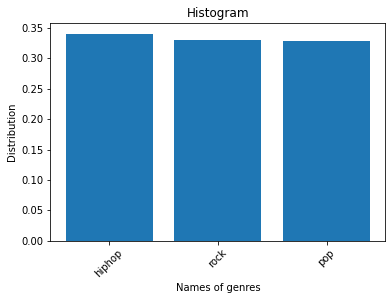

In [66]:
pyplot.xticks(range(len(cat_dist)), GENRES)
pyplot.xlabel('Names of genres')
pyplot.ylabel('Distribution')
pyplot.title('Histogram')
pyplot.xticks(rotation=45)
pyplot.bar(range(len(cat_dist)), cat_dist) 
pyplot.show()

In [5]:
# map genre labels to numbers
GENRES_MAP = {
    'hiphop': 0,
    'rock': 1,
    'pop': 2,
}
features_combined['genre_label'] = features_combined['genre_label'].map(GENRES_MAP)
features_combined['genre_label']

0       0
1       0
2       0
3       0
4       0
       ..
3332    0
3333    0
3334    2
3335    2
3336    0
Name: genre_label, Length: 3337, dtype: int64

### Numerical features

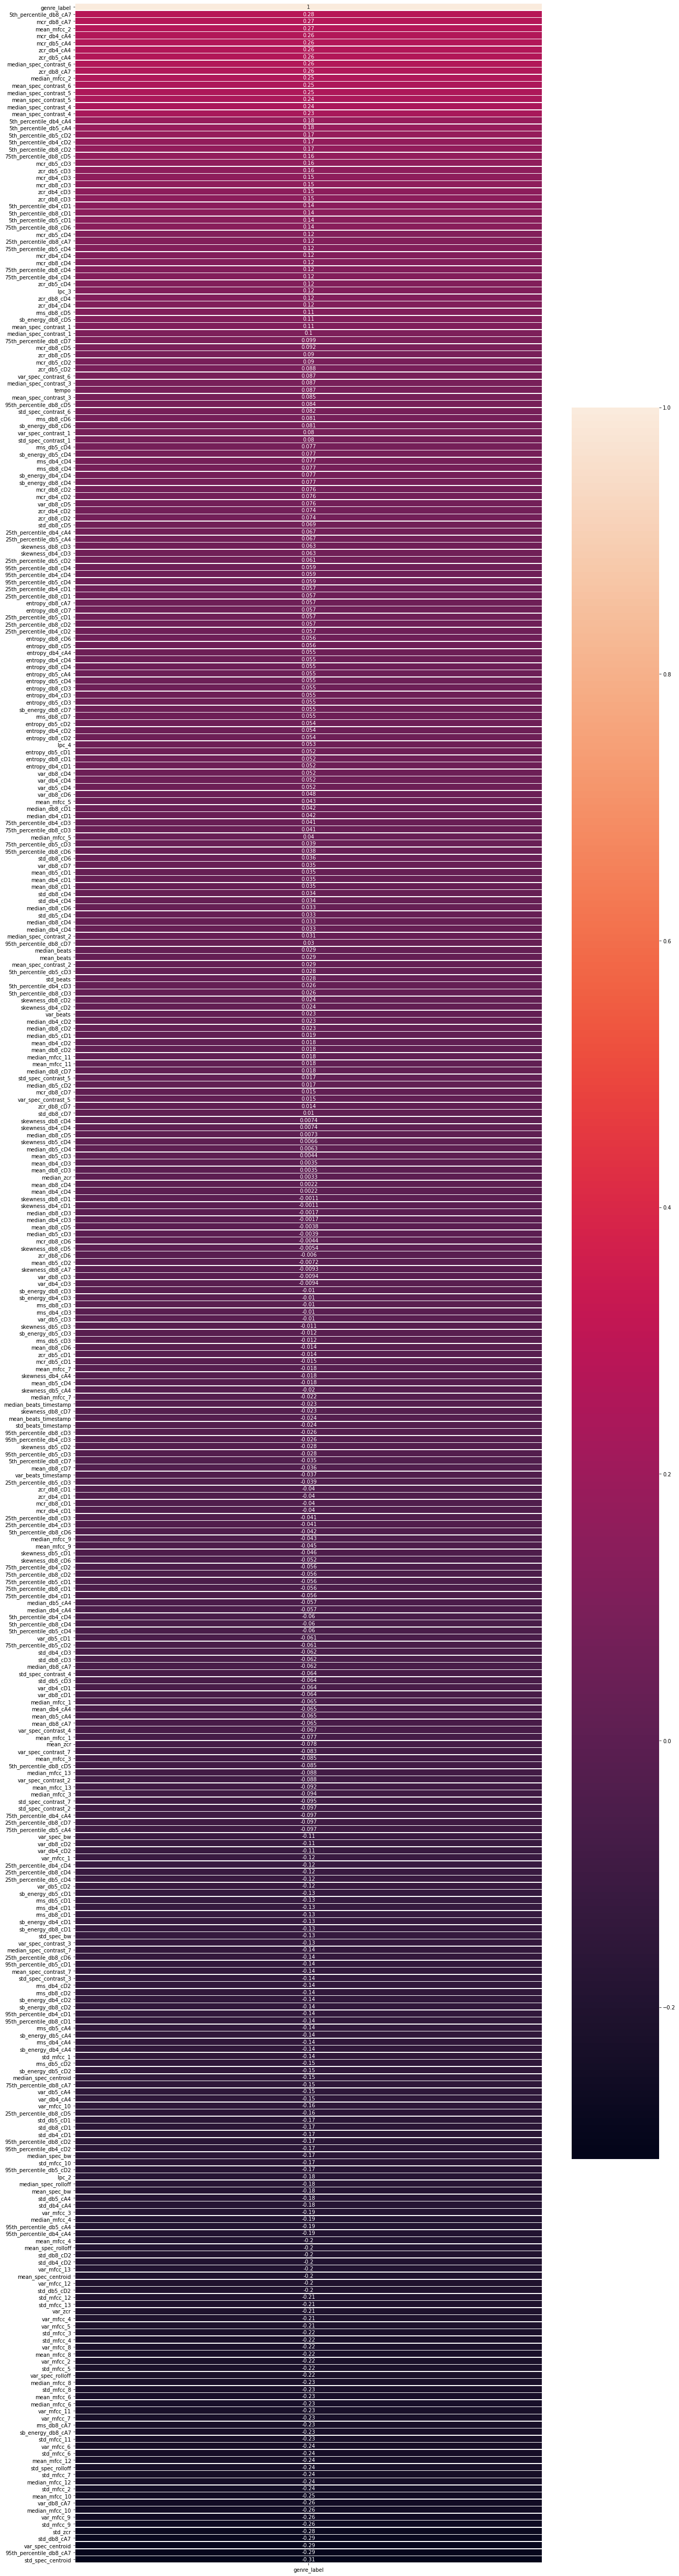

In [68]:
# plot heatmap to show correlation of numeraical features with target variable
_, ax = pyplot.subplots(figsize=(20,90))
seaborn.heatmap(features_combined.corr()[['genre_label']].sort_values(
    by=['genre_label'], ascending=False), annot=True, linewidths=.5, ax=ax)

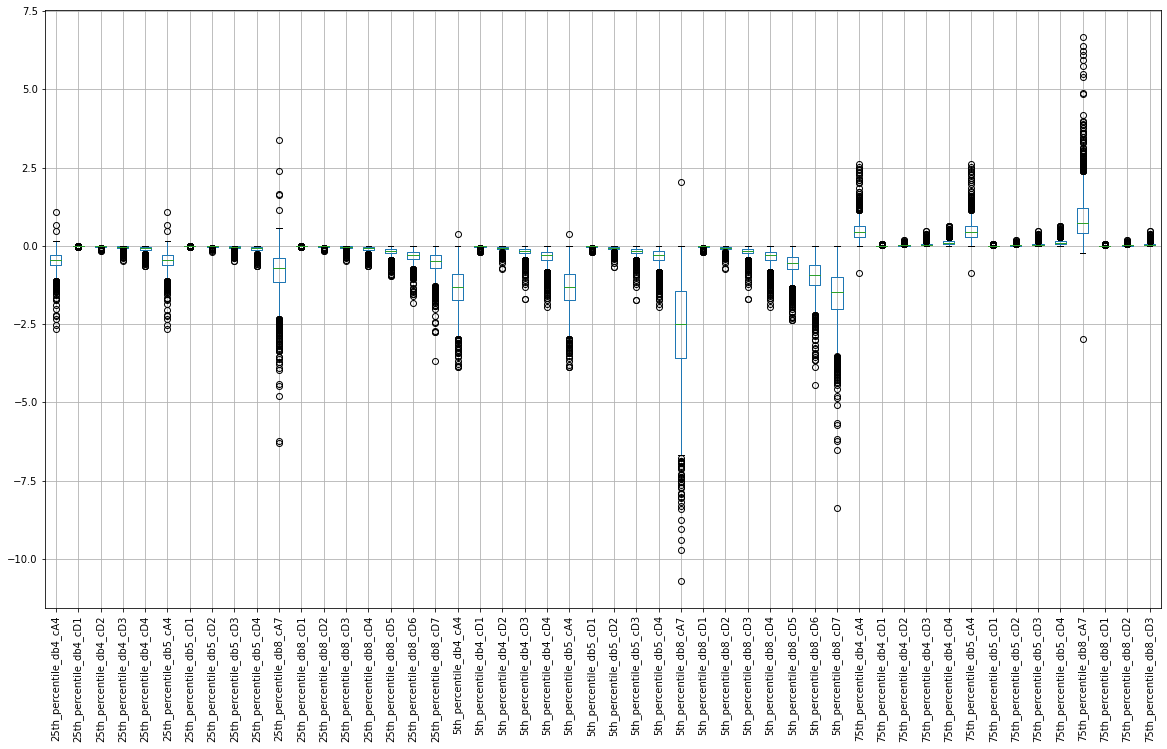

In [6]:
# Plot boxplot to visualize outliers
features_combined.iloc[:,0:50].boxplot(figsize=(20,11), rot=90)

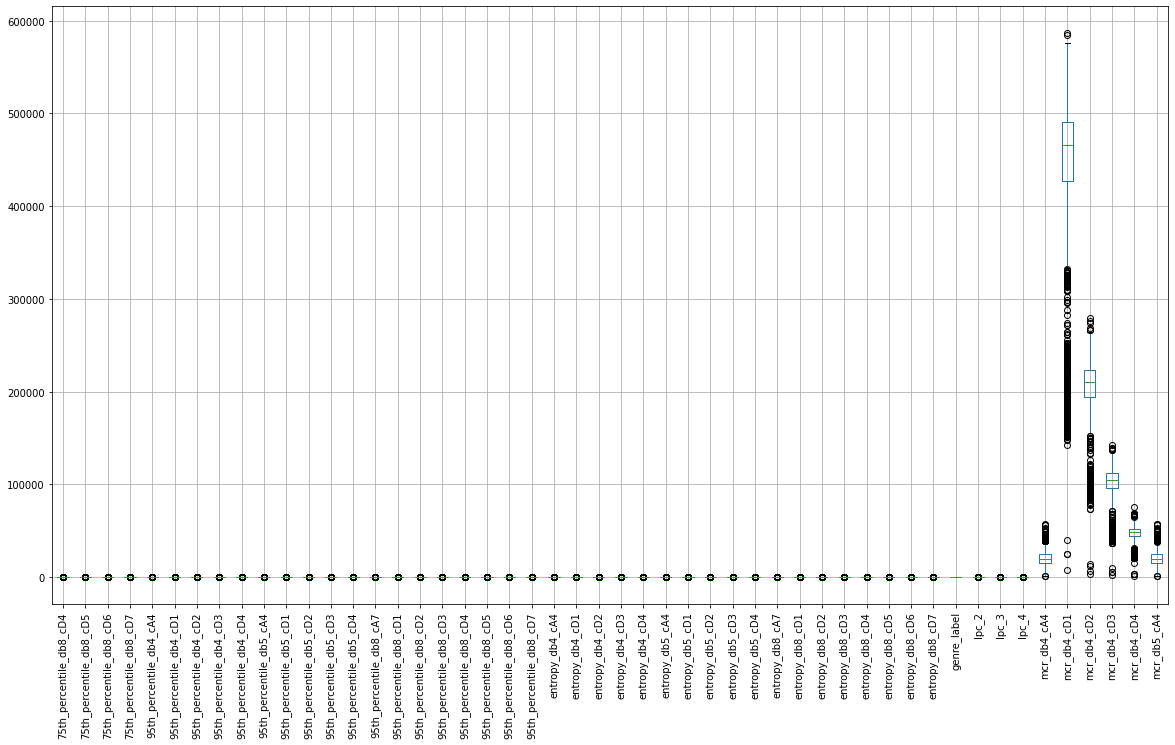

In [7]:
features_combined.iloc[:,50:100].boxplot(figsize=(20,11), rot=90)

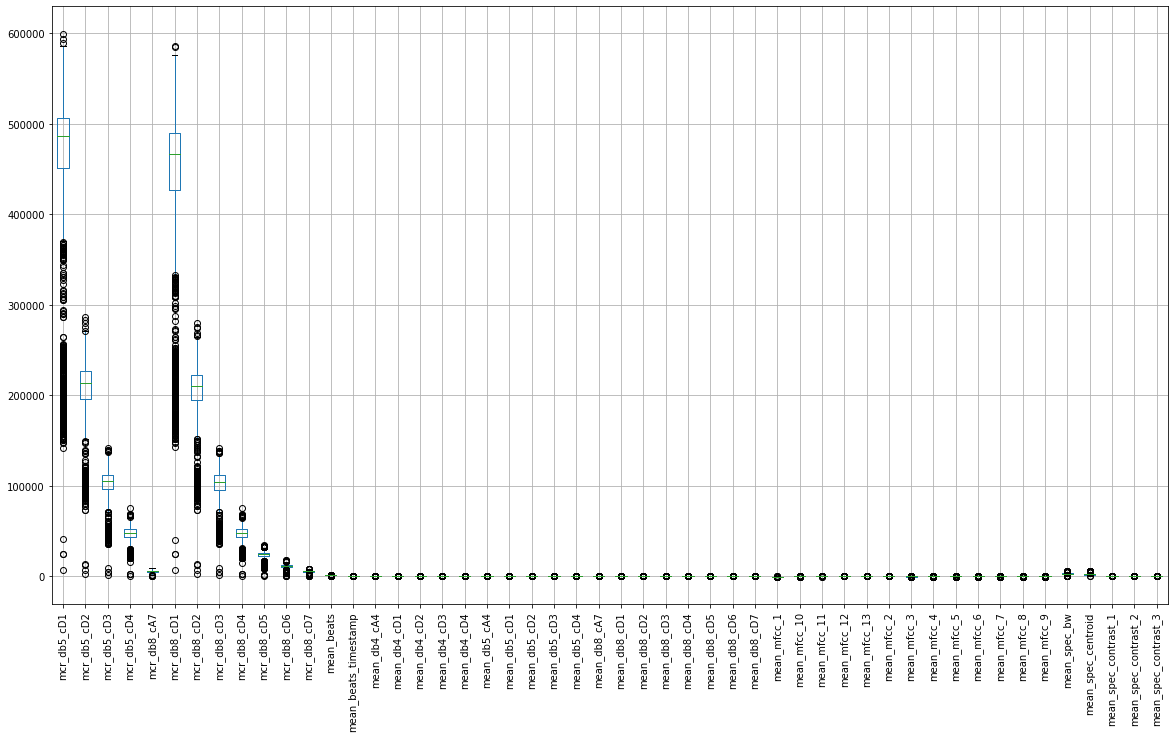

In [8]:
features_combined.iloc[:,100:150].boxplot(figsize=(20,11), rot=90)

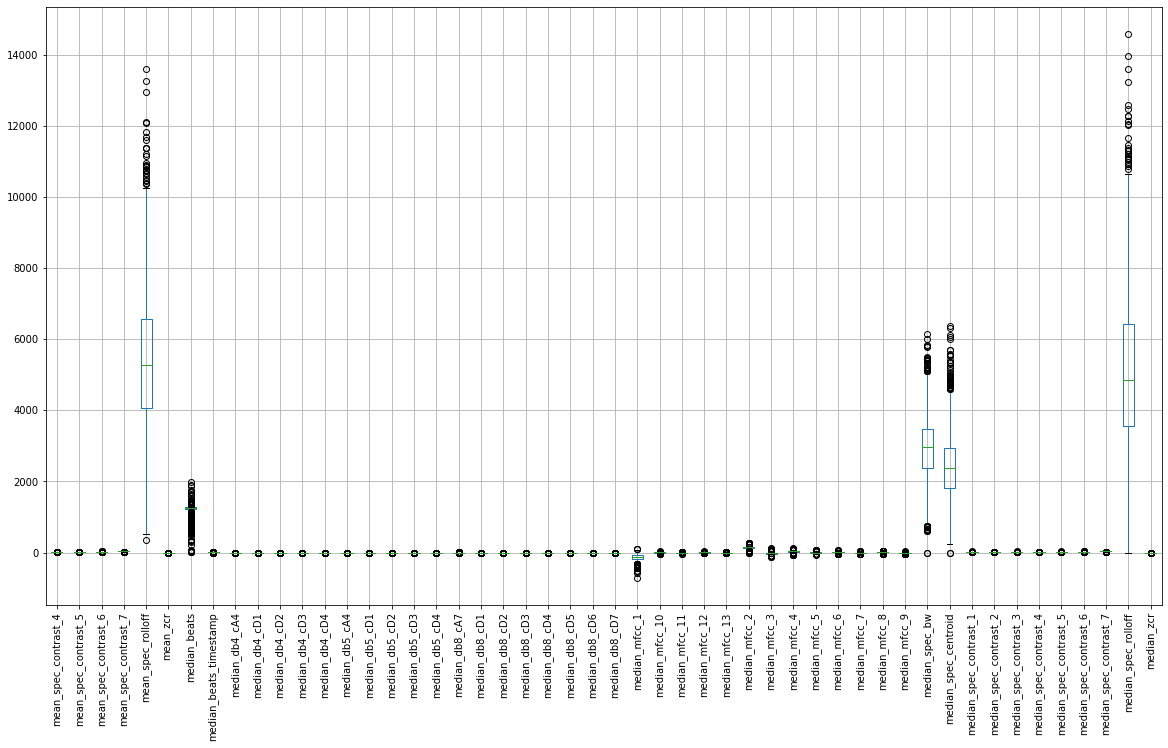

In [9]:
features_combined.iloc[:,150:200].boxplot(figsize=(20,11), rot=90)

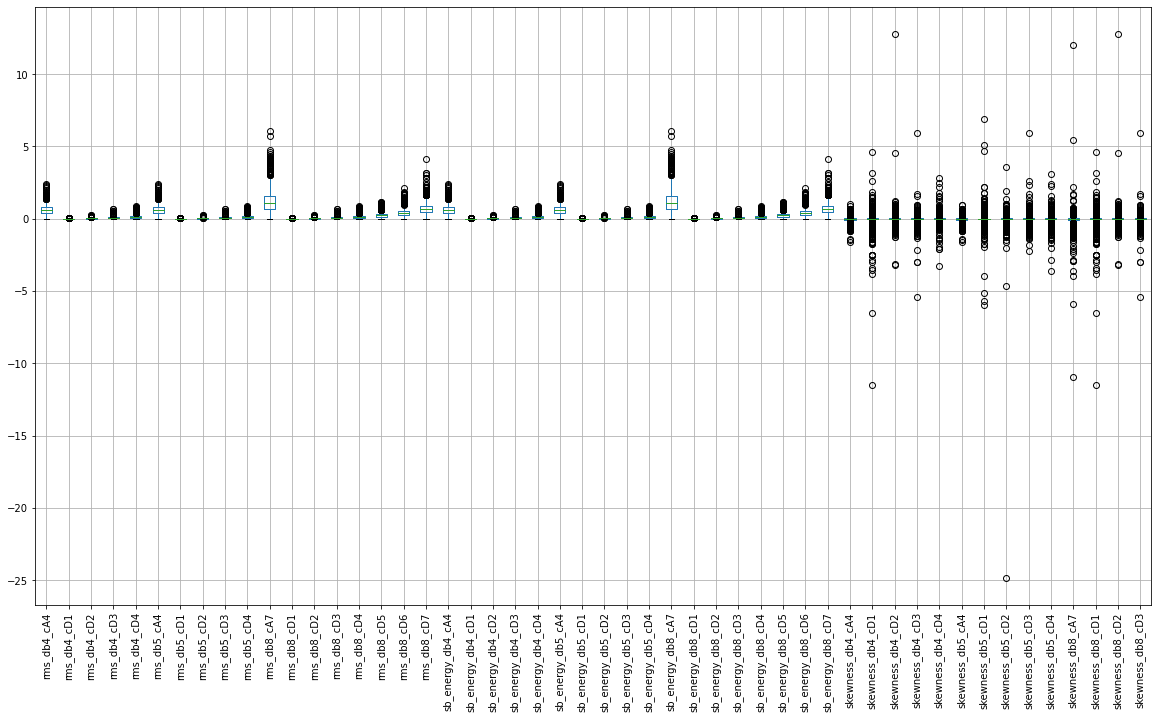

In [10]:
features_combined.iloc[:,200:250].boxplot(figsize=(20,11), rot=90)

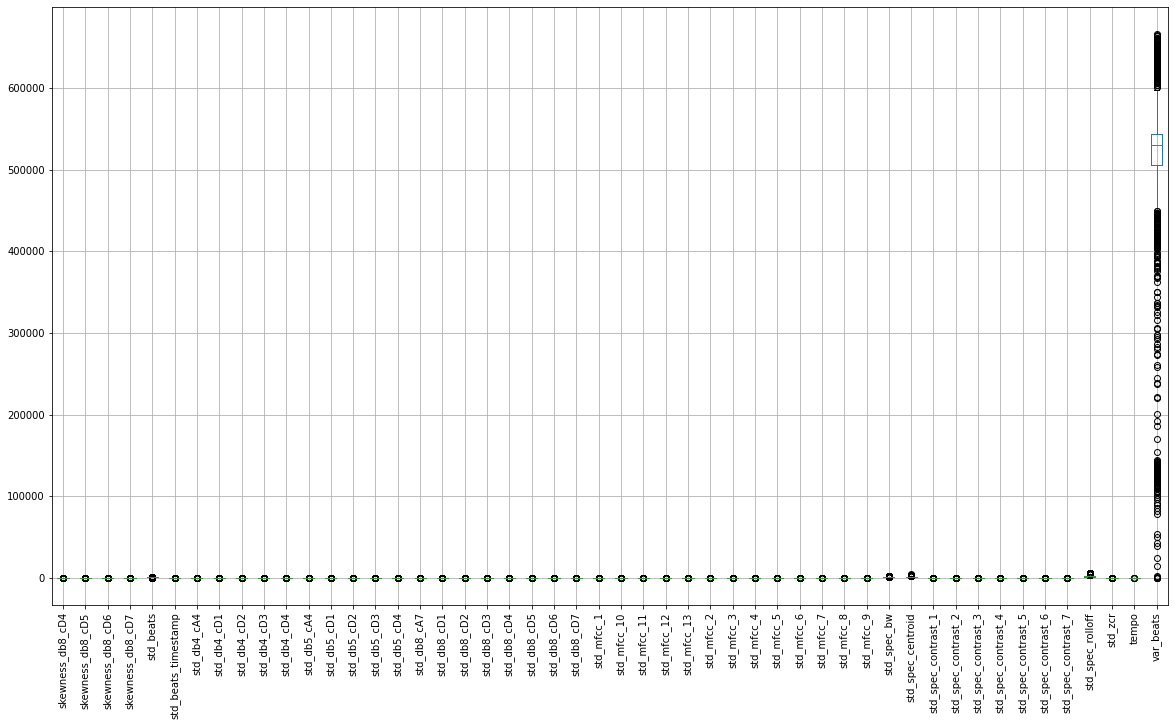

In [11]:
features_combined.iloc[:,250:300].boxplot(figsize=(20,11), rot=90)

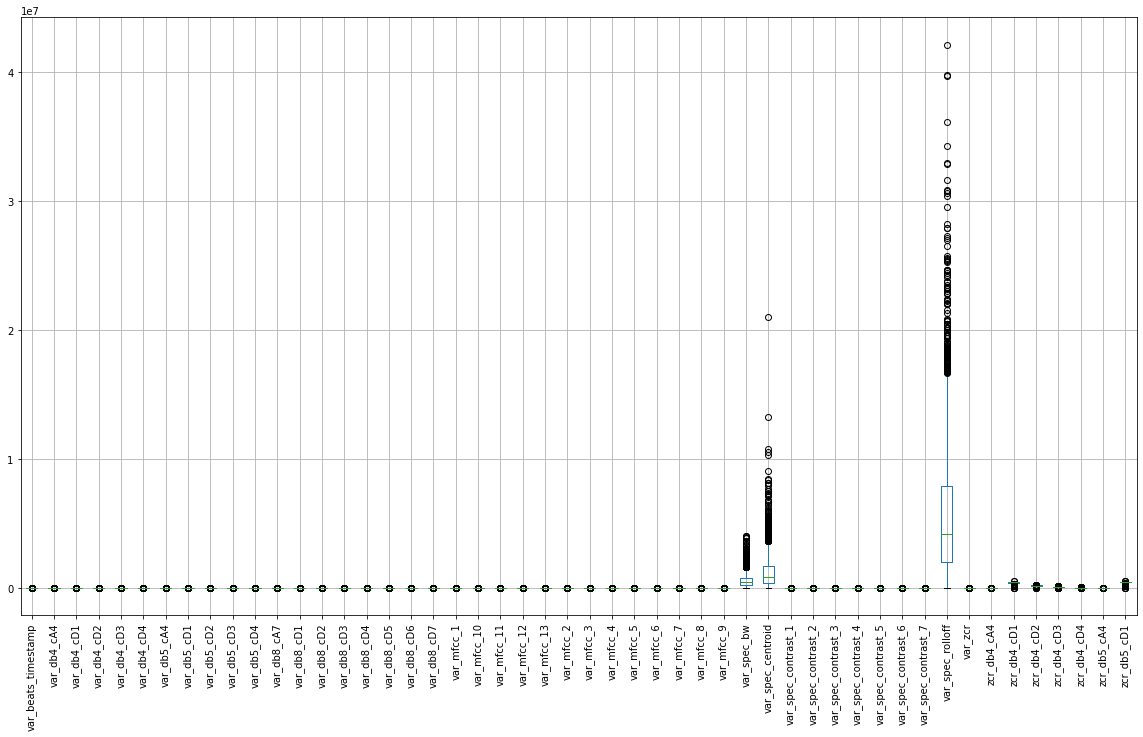

In [12]:
features_combined.iloc[:,300:350].boxplot(figsize=(20,11), rot=90)

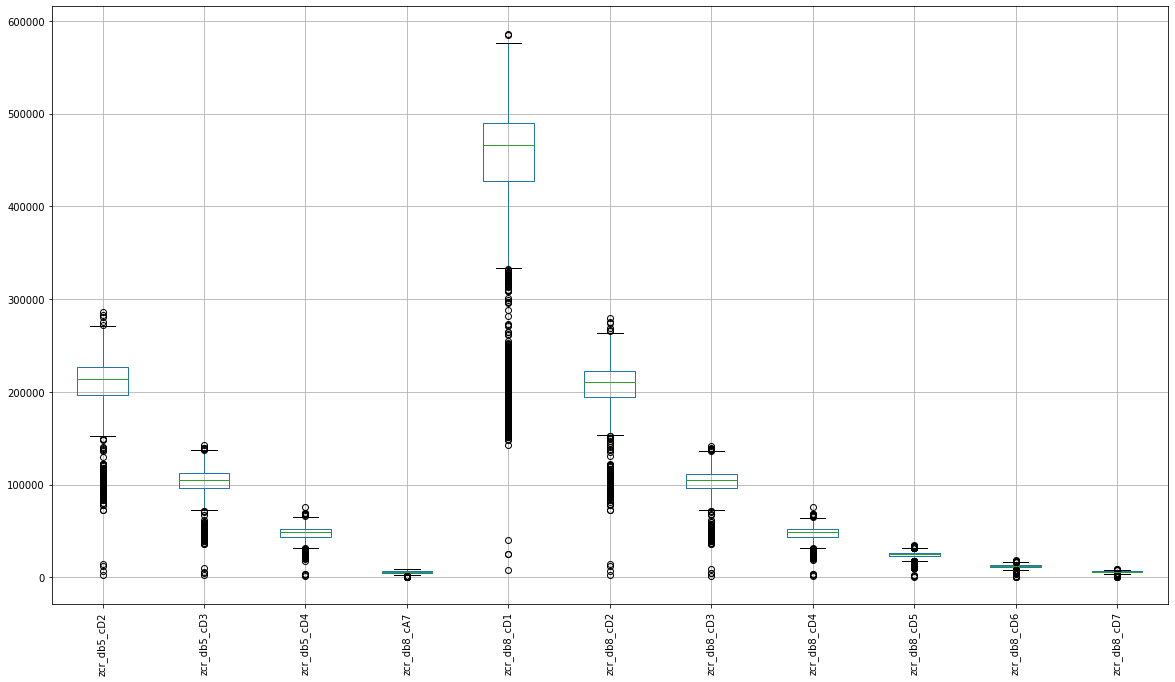

In [13]:
features_combined.iloc[:,350:].boxplot(figsize=(20,11), rot=90)

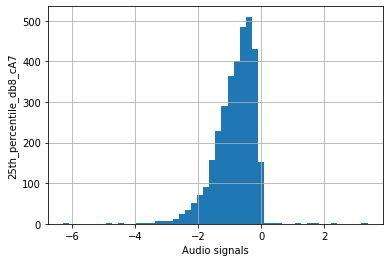

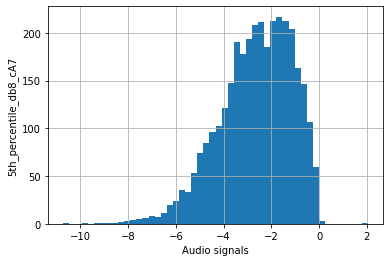

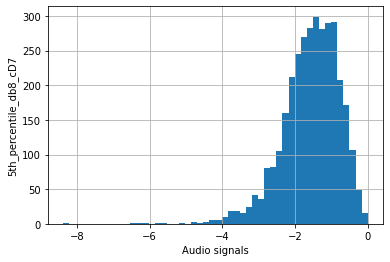

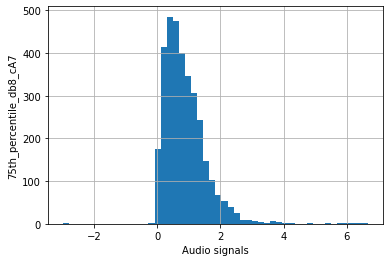

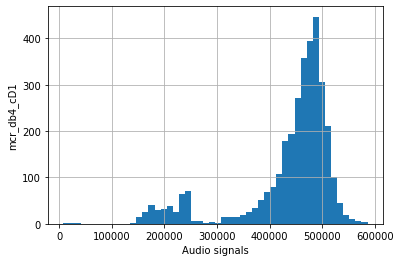

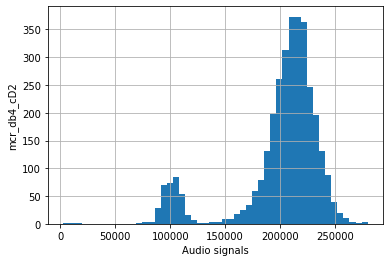

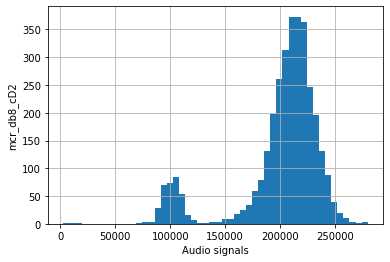

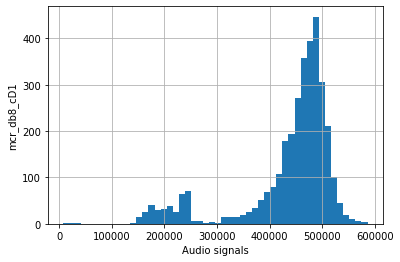

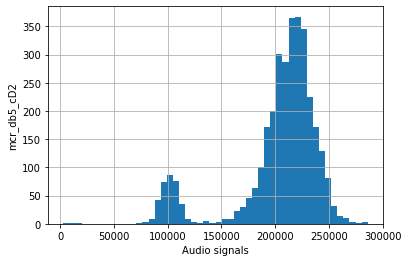

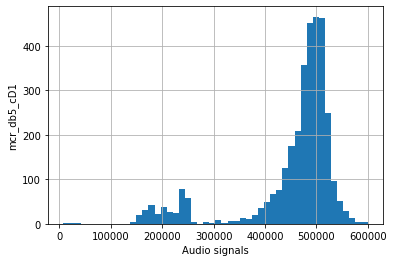

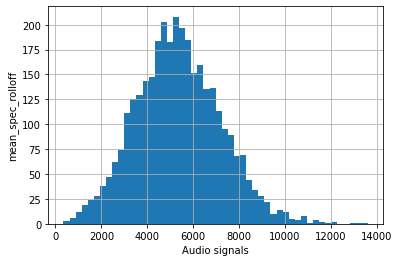

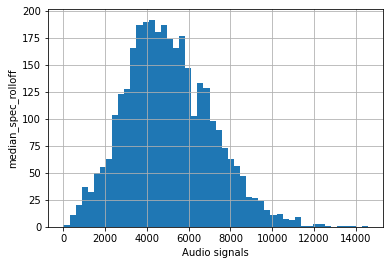

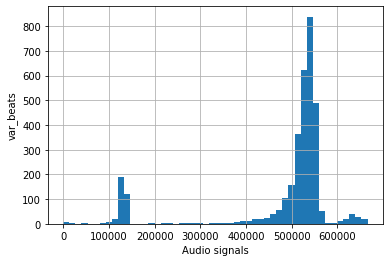

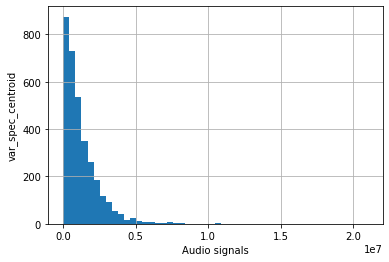

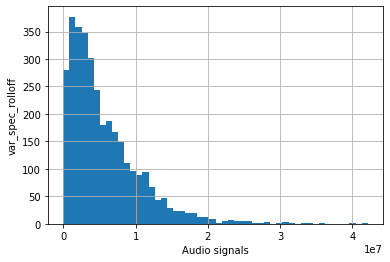

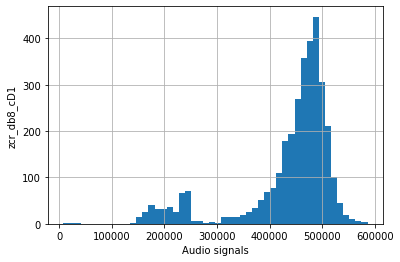

In [16]:
outliers= ['25th_percentile_db8_cA7', '5th_percentile_db8_cA7', '5th_percentile_db8_cD7',
           '75th_percentile_db8_cA7', 'mcr_db4_cD1', 'mcr_db4_cD2', 'mcr_db8_cD2',
           'mcr_db8_cD1', 'mcr_db5_cD2','mcr_db5_cD1','mean_spec_rolloff','median_spec_rolloff',
           'var_beats','var_spec_centroid','var_spec_rolloff','zcr_db8_cD1']

for column in outliers:
    features_combined[column].hist(bins=50)
    pyplot.xlabel("Audio signals")
    pyplot.ylabel(column)
    pyplot.show()

In [17]:
features_combined.to_csv(MOUNTED_DATASET_PATH + '/data/cleaned_features_1.csv')